In [ ]:
import numpy as np
import pandas as pd

import sqlalchemy

import matplotlib as mpl
import matplotlib.pyplot as plt
import mplfinance as mpf
import warnings

warnings.filterwarnings("ignore")

for m in [np, pd, sqlalchemy, mpl, mpf]:
    print(m.__name__, m.__version__)

In [4]:
from comm.backtest_funcs import read_backtest_from_sql, read_bar_from_sql
from comm.backtest_funcs import read_order_from_sql, read_orders_from_sql
from comm.backtest_funcs import read_trade_from_sql, read_trades_from_sql
from comm.backtest_funcs import merge_bar_trade_df, join_bar_trade_df, display_bar_candle

from comm.backtest_funcs import BAR_COLUMNS, ORDER_COLUMNS, TRADE_COLUMNS, BAR_TRADE_COLUMNS

ImportError: attempted relative import with no known parent package

In [3]:
backtest_id = 32

BACKTEST_COLUMNS  = ['broker_id', 'user_id', 'symbol', 'bar_type', 'bar_freq',
                     'status', 'bar_date_start', 'bar_time_start', 'bar_date_end', 'bar_time_end']

In [4]:
backtest_df = read_backtest_from_sql(backtest_id)
print(backtest_df.shape)
backtest_df[BACKTEST_COLUMNS].head()

(0, 19)


,broker_id,user_id,symbol,bar_type,bar_freq,status,bar_date_start,bar_time_start,bar_date_end,bar_time_end
id,,,,,,,,,,


In [22]:
bar_df = read_bar_from_sql(backtest_id, 'FG2401', 'MIN', 3)
print(bar_df.shape)
bar_df[BAR_COLUMNS].head()

(53, 13)


,open,high,low,close,volume
ts,,,,,
2023-08-18 14:18:00,1575.0,1575.0,1566.0,1566.0,15041
2023-08-18 14:21:00,1567.0,1569.0,1566.0,1569.0,9946
2023-08-18 14:24:00,1568.0,1571.0,1568.0,1570.0,6251
2023-08-18 14:30:00,1570.0,1571.0,1557.0,1559.0,33311
2023-08-18 14:33:00,1559.0,1564.0,1559.0,1562.0,13415


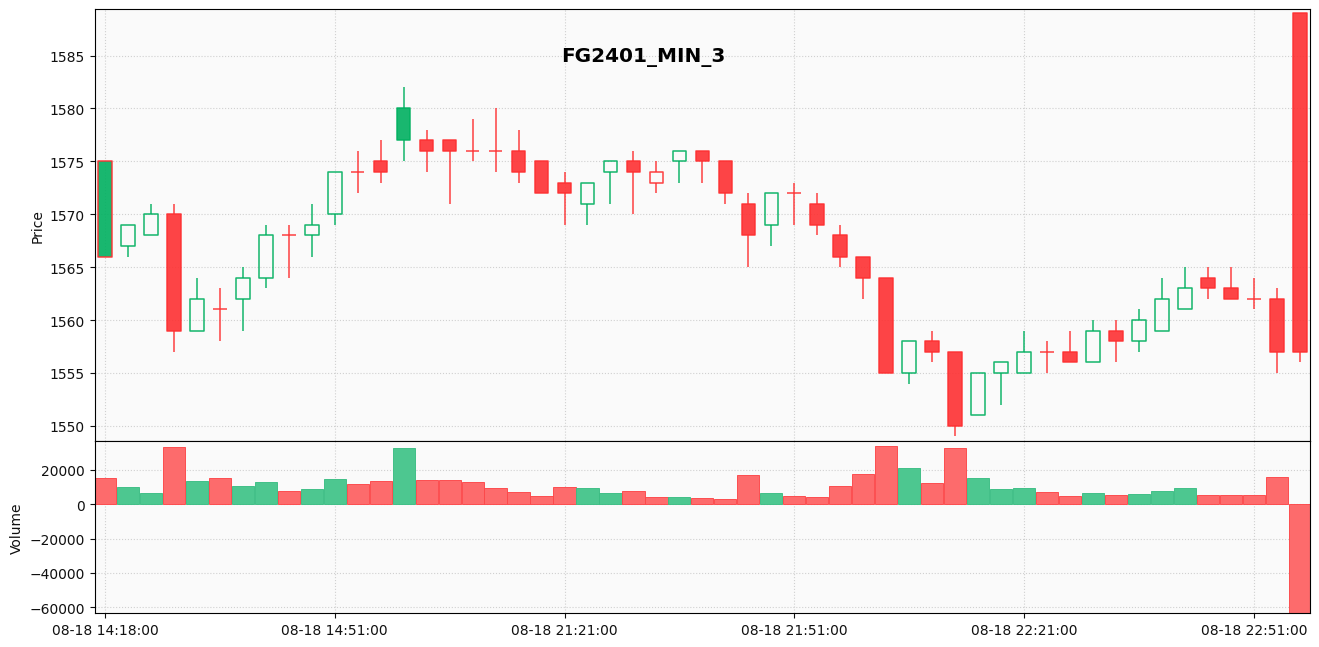

In [23]:
# bar candle
display_bar_candle('FG2401_MIN_3', bar_df)

In [24]:
bar_df.tail()

,id,symbol,date,time,open,high,low,close,volume,ask_price,ask_volume,bid_price,bid_volume
ts,,,,,,,,,,,,,
2023-08-18 22:45:00,256,FG2401,20230818,22:45:00,1564.0,1565.0,1562.0,1563.0,5254,1564.220,210397,1562.873,97625
2023-08-18 22:48:00,257,FG2401,20230818,22:48:00,1563.0,1565.0,1562.0,1562.0,5119,1564.087,275521,1562.777,100739
2023-08-18 22:51:00,258,FG2401,20230818,22:51:00,1562.0,1564.0,1561.0,1562.0,4999,1563.367,246959,1562.346,132831
2023-08-18 22:54:00,259,FG2401,20230818,22:54:00,1562.0,1563.0,1555.0,1557.0,15976,1560.258,180162,1558.267,159340
2023-08-18 22:57:00,166,FG2401,20230818,22:57:00,1589.0,1589.0,1556.0,1557.0,-211273,1558.929,132227,1557.493,196238


In [25]:
order_df = read_order_from_sql(backtest_id)
print(order_df.shape)
order_df[ORDER_COLUMNS].head()

(4, 24)


,price,volume,direction,offset,order_type,order_source,order_status
ts,,,,,,,
2023-08-18 22:00:00,1564.0,1,LONG,OPEN,Normal,BUY,T
2023-08-18 22:02:00,1564.0,1,LONG,OPEN,Normal,BUY,T
2023-08-18 22:09:00,1556.0,1,LONG,CLOSE,Normal,BUY,T
2023-08-18 22:14:00,1550.0,1,LONG,OPEN,Normal,BUY,T


In [26]:
trade_df = read_trades_from_sql(backtest_id)

trade_long_open_df   = trade_df[0]
trade_long_close_df  = trade_df[1]
trade_short_open_df  = trade_df[2]
trade_short_close_df = trade_df[3]

print(trade_long_open_df.shape, trade_long_close_df.shape, trade_short_open_df.shape, trade_short_close_df.shape)
trade_short_close_df.head(7)

(3, 6) (1, 6) (0, 6) (0, 6)


,price,volume,direction,offset,trade_type,trade_source
ts,,,,,,


In [27]:
df_long_open   = join_bar_trade_df(bar_df, trade_long_open_df)
df_long_close  = join_bar_trade_df(bar_df, trade_long_close_df)
df_short_open  = join_bar_trade_df(bar_df, trade_short_open_df)
df_short_close = join_bar_trade_df(bar_df, trade_short_close_df)

bar_trade_df = (df_long_open, df_long_close, df_short_open, df_short_close)
bar_trade_size = [(0, 0) if df is None else df.shape for df in bar_trade_df]
print(bar_trade_size)

df_short_close.head()

[(53, 5), (53, 5), (53, 1), (53, 1)]


,close
ts,
2023-08-18 14:18:00,1566.0
2023-08-18 14:21:00,1569.0
2023-08-18 14:24:00,1570.0
2023-08-18 14:30:00,1559.0
2023-08-18 14:33:00,1562.0


len of apds is 2


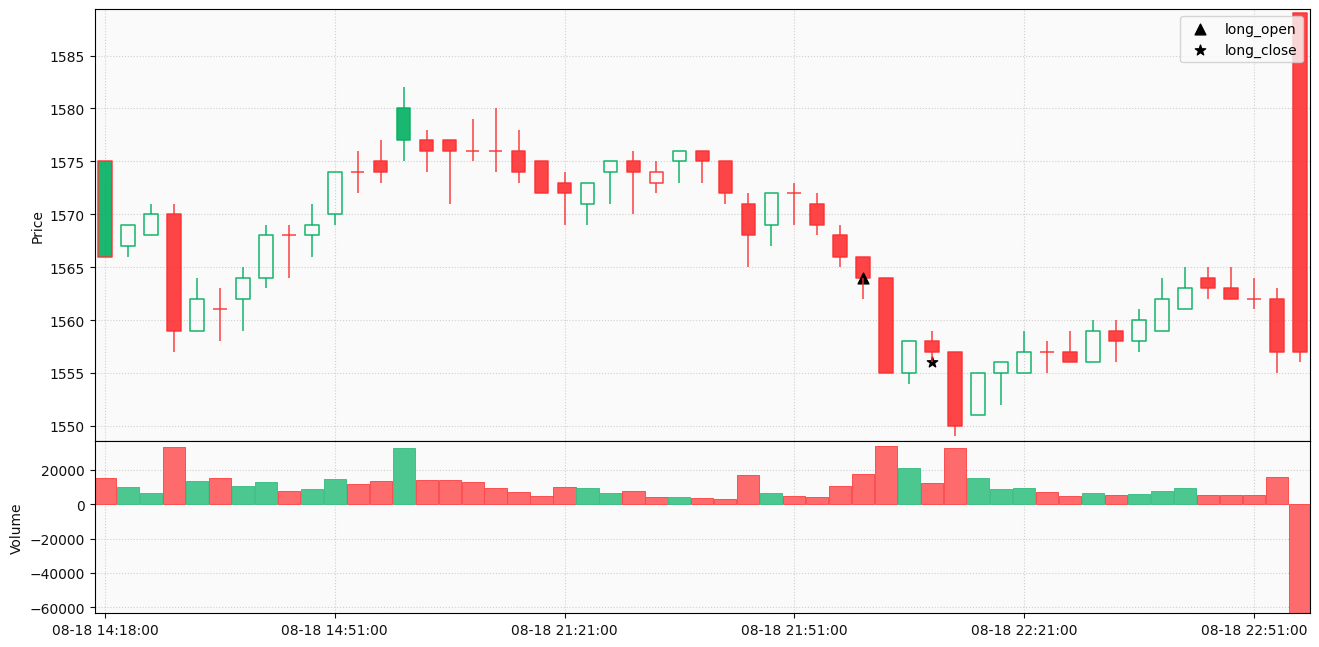

In [36]:
apds = []

def make_addplot(df: pd.DataFrame, marker: str, color: str, label: str):
    """
    :param df
    :param marker
    :param color
    :param label
    """
    marker_kws = dict(type='scatter', markersize=60)
    return mpf.make_addplot(df, **marker_kws, marker=marker, color=color, label=label)

if df_long_open.shape[1] > 1:
    apds.append(make_addplot(df_long_open['price'], 
                             marker='^', color='black', label="long_open"))
    
if df_long_close.shape[1] > 1:
    apds.append(make_addplot(df_long_close['price'], 
                             marker='v', color='black', label="long_close"))
    
if df_short_open.shape[1] > 1:
    apds.append(make_addplot(df_short_open['price'], 
                             marker='^', color='blue', label="short_open"))
    
if df_short_close.shape[1] > 1:
    apds.append(make_addplot(df_short_close['price'], 
                             marker='v', color='blue', label="short_close"))
    
print(f"len of apds is {len(apds)}")

display_bar_candle('', bar_df, apds)